In [ ]:
from google.colab import files
import pandas as pd
import io

# Upload the file
uploaded = files.upload()
file_name = list(uploaded.keys())[0]


# Determine encoding based on your file (replace 'utf-8' with the correct encoding if necessary)
df = pd.read_csv(io.BytesIO(uploaded[file_name]), encoding='iso-8859-1')

# Display the first few rows
df.head()

Saving analysisdataset (5).csv to analysisdataset (5).csv


,messageid,Fulltext,Sender,SenderType,timeReceived,MainText,Url,Subdomain,Domain,TLD,...,Phishing,Suspicious,Malware,Brand,URL Subcategory,Message Categories,FullyQualifiedDomain,Domain Registrar,Domain Creation Date,Domain Last Update
0,3,"Text Message\nThu, Jul 29, 19:10\nCostco: Dani...",42003,Short Code,"03/31/2022, 21:58:50","Costco: Daniel, the code 42003 printed on your...",f2gpy.info/RzNKEwsZve,NaN,f2gpy,info,...,0.0,0.0,0.0,Costco,Random Domain,Prize/Contest,f2gpy.info,"NameCheap, Inc.",7/28/2021,7/31/2021
1,5,"<\n+1 (872) 279-0672 >\nText Message\nWed, Feb...",+1 (872) 279-0672,Phone Number,"04/02/2022, 02:59:56","Hi, you still owe UPS $4.10 USD in customs fee...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,UPS,NaN,Delivery,NaN,NaN,NaN,NaN
2,6,"<\n+1 (806) 224-7886 >\nText Message\nThu, Sep...",+1 (806) 224-7886,Phone Number,"04/02/2022, 03:03:00",wel01.us/r/rest05 WELLS FARGO(CS):Profile lock...,wel01.us/r/rest05,NaN,wel01,us,...,0.0,0.0,0.0,WELLS FARGO,Random Domain,Account Alert,wel01.us,"NameCheap, Inc.",8/30/2021,8/30/2021
3,7,Text Message\nToday 2:30 PM\nwho played golf\n...,NaN,NaN,"04/02/2022, 23:42:38","Hi, are you who played golf together last time...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Wrong Number/Romance Scam,NaN,NaN,NaN,NaN
4,8,(8\n+1 (775) 537-4497\ncanador to them\nTato m...,+1 (775) 537-4497,Phone Number,"04/02/2022, 23:46:34","(8 Hi Julianne long time no see, I'm Aleen, ho...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Wrong Number/Romance Scam,NaN,NaN,NaN,NaN


In [ ]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import spacy

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

nltk.download('stopwords')

# Initialize stop words, lemmatizer, and spacy model
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
nlp = spacy.load('en_core_web_sm')

nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
from itertools import permutations

# Function to generate all possible space-separated permutations of a URL
def generate_url_permutations(url):
    # Break the URL into individual characters
    chars = list(url)
    # Create permutations of spaces between characters
    permutations_list = []
    for i in range(len(chars)):
        # Add spaces between characters at all positions
        permutations_list.append(''.join(chars[:i] + [' '] + chars[i:]))
    # Return all unique permutations, including the original URL
    return set([url] + permutations_list)

# Function to remove the URL from MainText with permutations
def remove_url(main_text, url):
    if pd.isna(url):  # Skip if URL is NaN
        return main_text

    # Generate possible permutations of the URL with spaces
    url_variants = generate_url_permutations(url)

    # Check and remove all permutations of the URL from the MainText
    for variant in url_variants:
        main_text = main_text.replace(variant, '')

    return main_text

# Example: Apply the function to a DataFrame
# Assuming df is your DataFrame with columns 'URL' and 'MainText'
df['CleanedMessage'] = df.apply(lambda row: remove_url(row['MainText'], row['Url']), axis=1)



In [ ]:
# Save the cleaned dataset
df.to_csv('cleaned_dataset112720241500.csv', index=False)


from google.colab import files
files.download('cleaned_dataset112720241500.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Calculate the character counts
df['MainTextLength'] = df['MainText'].str.len()
df['UrlLength'] = df['Url'].str.len().fillna(0).astype(int)  # Handle NaN as 0
df['CleanedMessageLength'] = df['CleanedMessage'].str.len()
# Calculate LengthMatch with a threshold of ±2
df['LengthMatch'] = (df['MainTextLength'] - df['UrlLength'] - df['CleanedMessageLength']).abs() <= 2

# Display the comparison
print(df[['MainTextLength', 'UrlLength', 'CleanedMessageLength', 'LengthMatch']])

      MainTextLength  UrlLength  CleanedMessageLength  LengthMatch
0                118         21                    96         True
1                128          0                   128         True
2                120         17                   103         True
3                 56          0                    56         True
4                 62          0                    62         True
...              ...        ...                   ...          ...
1057              55          0                    55         True
1058              36          0                    36         True
1059             400         18                   381         True
1060             129         20                   109         True
1061             105         20                    85         True

[1062 rows x 4 columns]


In [ ]:
# Preprocessing function
def preprocess_text_2(text):
    # Lowercase
    text = text.lower()


    # Remove special characters and numbers (optional, can retain numbers if needed)
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenization
    tokens = word_tokenize(text)

    # Remove stop words and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    # Join tokens back to string
    processed_text2 = ' '.join(tokens)

    return processed_text2

In [ ]:
# Apply the preprocessing to the 'ManiText' column and create a new column 'Cleaned_Message'
df['SuperCleanedMessage'] = df['CleanedMessage'].apply(preprocess_text_2)

In [ ]:
df.to_csv('super_cleaned_dataset112720241500.csv', index=False)

from google.colab import files
files.download('super_cleaned_dataset112720241500.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install bertopic


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 55.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.5 MB/s eta 0:00:00


In [ ]:
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

def apply_bertopic(df, text_column='SuperCleanedMessage', min_topic_size=9):
    # Extract the text data, ensuring it's string type and handling NaNs
    texts = df[text_column].astype(str).fillna('').tolist()

    # Initialize BERTopic model
    topic_model = BERTopic(min_topic_size=min_topic_size, verbose=True)

    # Fit the model and get the topics
    topics, probabilities = topic_model.fit_transform(texts)

    # Add the topics to the DataFrame
    df['BERTopic_Label'] = topics

    # Get topic representations (top words for each topic)
    topic_info = topic_model.get_topic_info()
    print(topic_info)

    # Add the top 3 words for each topic to the DataFrame
    top_words = {}
    for topic_id in topic_info['Topic'].unique():
        if topic_id == -1:  # Skip noise
            continue
        # Get the top words for this topic
        words = [word for word, _ in topic_model.get_topic(topic_id)[:3]]
        top_words[topic_id] = words

    # Create new columns for top 3 words
    df['BERTopic_1'] = df['BERTopic_Label'].map(lambda x: top_words.get(x, ['', '', ''])[0])
    df['BERTopic_2'] = df['BERTopic_Label'].map(lambda x: top_words.get(x, ['', '', ''])[1])
    df['BERTopic_3'] = df['BERTopic_Label'].map(lambda x: top_words.get(x, ['', '', ''])[2])

    return df, topic_model, topic_info # Return topic_info

# Apply BERTopic to the DataFrame
df, topic_model, topic_info = apply_bertopic(df) # Assign topic_info

# Display the first few rows to check the new columns
print(df[['BERTopic_Label', 'BERTopic_1', 'BERTopic_2', 'BERTopic_3']].head())

2024-11-27 21:23:33,093 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/34 [00:00<?, ?it/s]

2024-11-27 21:23:52,096 - BERTopic - Embedding - Completed ✓
2024-11-27 21:23:52,097 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-11-27 21:23:56,836 - BERTopic - Dimensionality - Completed ✓
2024-11-27 21:23:56,843 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-11-27 21:23:56,954 - BERTopic - Cluster - Completed ✓
2024-11-27 21:23:56,966 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-11-27 21:23:57,078 - BERTopic - Representation - Completed ✓


    Topic  Count                                         Name  \
0      -1    168          -1_package_address_number_delivered   
1       0    171                   0_account_visit_card_alert   
2       1    128                           1_im_hi_hey_friend   
3       2     44          2_netflix_billing_membership_update   
4       3     44           3_refund_personal_penalty_expedite   
5       4     34        4_amazon_account_permanent_suspension   
6       5     34                     5_cv_survey_reward_quick   
7       6     31                 6_group_join_discussion_dear   
8       7     28                 7_stop_unsubscribe_reply_end   
9       8     27                8_tax_irs_american_understand   
10      9     24                    9_sm_open_activation_link   
11     10     23         10_gift_gratitude_record_exceptional   
12     11     23              11_address_package_wrong_update   
13     12     22              12_depot_home_homedepot_freebie   
14     13     21         

In [ ]:
# Total number of topics (excluding noise)
total_topics = len([topic for topic in topic_info['Topic'].unique() if topic != -1])
print(f"Total number of topics identified (excluding noise): {total_topics}")

Total number of topics identified (excluding noise): 31


In [ ]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary

# Tokenize text
texts = [doc.split() for doc in df['SuperCleanedMessage']]

# Create a dictionary and corpus for CoherenceModel
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Extract topics
topics = [topic_model.get_topic(topic_id) for topic_id in topic_model.get_topics() if topic_id != -1]
topic_words = [[word for word, _ in topic] for topic in topics]

# Compute coherence score
coherence_model = CoherenceModel(topics=topic_words, texts=texts, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()
print(f"Topic Coherence Score: {coherence_score}")

Topic Coherence Score: 0.7123658205532906


In [ ]:
# Visualize the topic hierarchy
topic_model.visualize_hierarchy()

# Visualize the distribution of documents across all topics
# Set `top_n_topics` to include all topics (including smaller ones)
topic_model.visualize_barchart(top_n_topics=total_topics)

In [ ]:
# Get the topic information from BERTopic
topic_info = topic_model.get_topic_info()

# Iterate through each topic and format the output
for index, row in topic_info.iterrows():
    #if row['Topic'] == -1:  # Skip the outlier topic (-1)
        #continue

    # Extract the topic ID and top words
    topic_id = row['Topic']
    top_words = [word for word, _ in topic_model.get_topic(topic_id)[:3]]  # Top 2 words for the topic

    # Extract the number of documents in the topic
    document_count = row['Count']

    # Print the formatted output
    print(f"Topic {topic_id} : {top_words}, {document_count}")

Topic -1 : ['package', 'address', 'number'], 168
Topic 0 : ['account', 'visit', 'card'], 171
Topic 1 : ['im', 'hi', 'hey'], 128
Topic 2 : ['netflix', 'billing', 'membership'], 44
Topic 3 : ['refund', 'personal', 'penalty'], 44
Topic 4 : ['amazon', 'account', 'permanent'], 34
Topic 5 : ['cv', 'survey', 'reward'], 34
Topic 6 : ['group', 'join', 'discussion'], 31
Topic 7 : ['stop', 'unsubscribe', 'reply'], 28
Topic 8 : ['tax', 'irs', 'american'], 27
Topic 9 : ['sm', 'open', 'activation'], 24
Topic 10 : ['gift', 'gratitude', 'record'], 23
Topic 11 : ['address', 'package', 'wrong'], 23
Topic 12 : ['depot', 'home', 'homedepot'], 22
Topic 13 : ['job', 'need', 'whatsapp'], 21
Topic 14 : ['march', 'little', 'bill'], 20
Topic 15 : ['invoice', 'month', 'present'], 19
Topic 16 : ['usps', 'activate', 'open'], 18
Topic 17 : ['sm', 'tax', 'irs'], 17
Topic 18 : ['suprise', 'brca', 'avoiy'], 17
Topic 19 : ['home', 'available', 'month'], 15
Topic 20 : ['subj', 'msg', 'alert'], 15
Topic 21 : ['frm', 'eve

In [ ]:
print(topic_info)


    Topic  Count                                         Name  \
0      -1    168          -1_package_address_number_delivered   
1       0    171                   0_account_visit_card_alert   
2       1    128                           1_im_hi_hey_friend   
3       2     44          2_netflix_billing_membership_update   
4       3     44           3_refund_personal_penalty_expedite   
5       4     34        4_amazon_account_permanent_suspension   
6       5     34                     5_cv_survey_reward_quick   
7       6     31                 6_group_join_discussion_dear   
8       7     28                 7_stop_unsubscribe_reply_end   
9       8     27                8_tax_irs_american_understand   
10      9     24                    9_sm_open_activation_link   
11     10     23         10_gift_gratitude_record_exceptional   
12     11     23              11_address_package_wrong_update   
13     12     22              12_depot_home_homedepot_freebie   
14     13     21         

In [ ]:
topic_model.visualize_barchart(top_n_topics=total_topics)
topic_model.visualize_hierarchy(top_n_topics=total_topics)

In [ ]:
pip install wordcloud


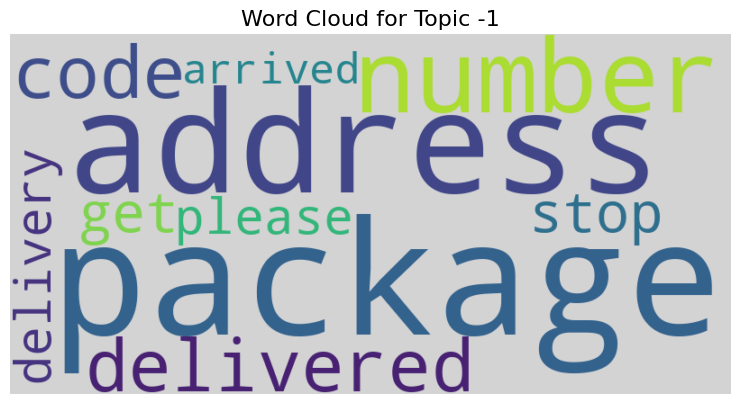

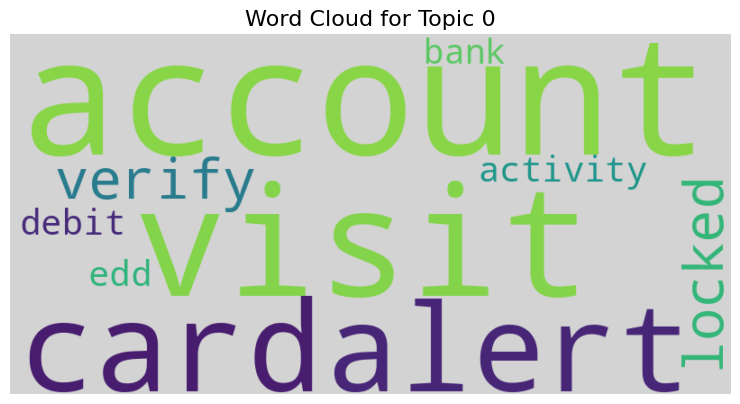

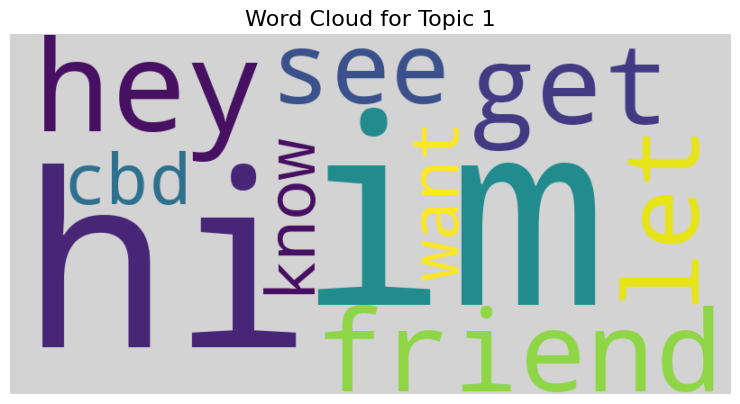

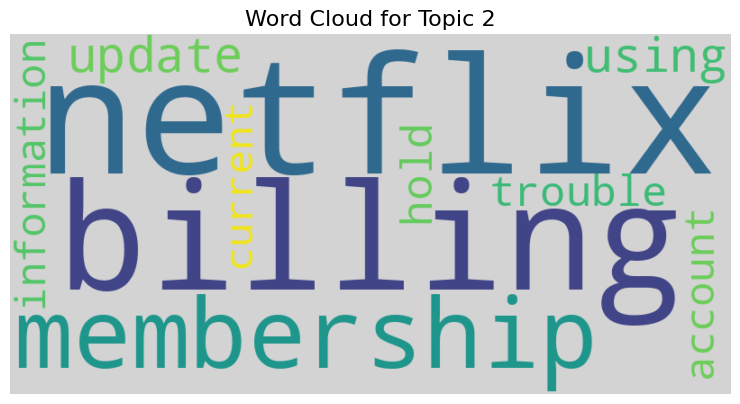

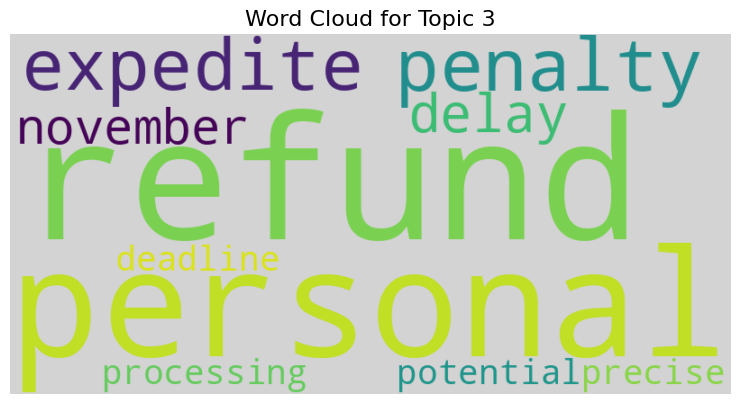

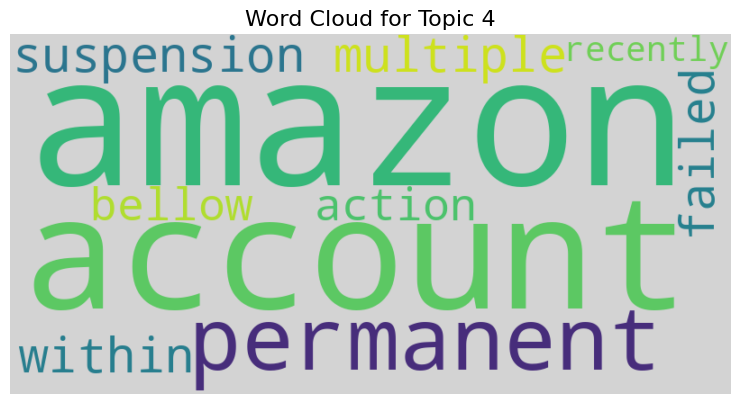

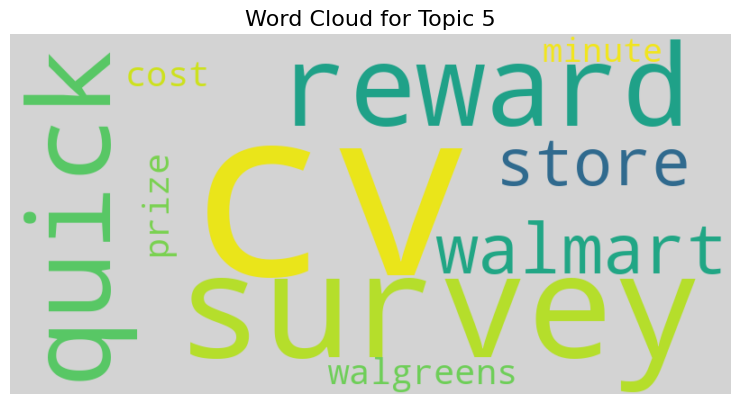

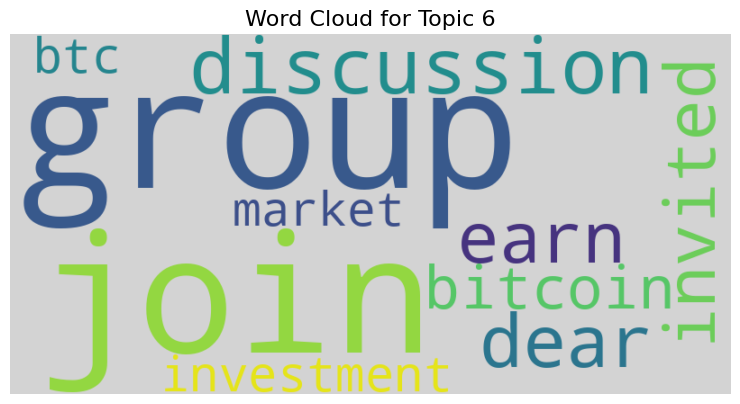

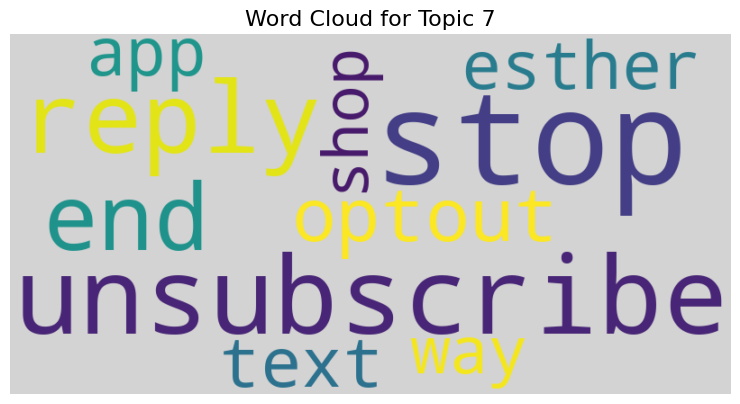

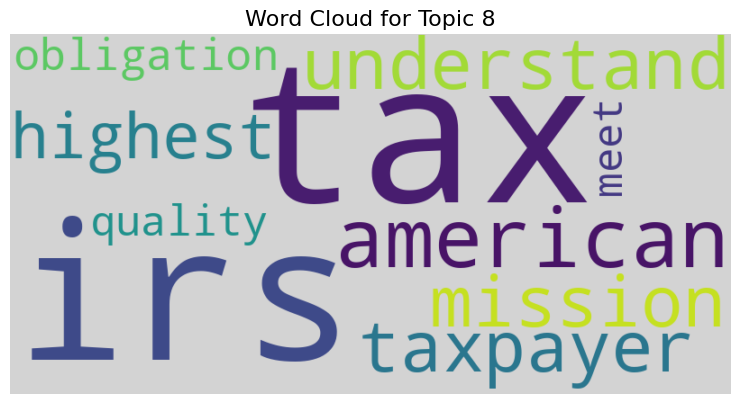

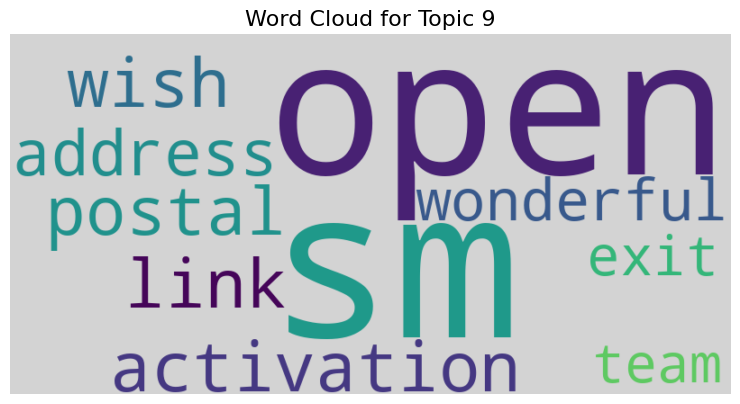

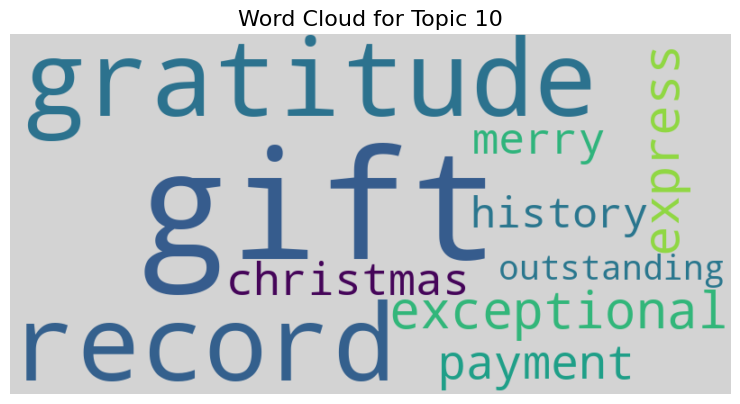

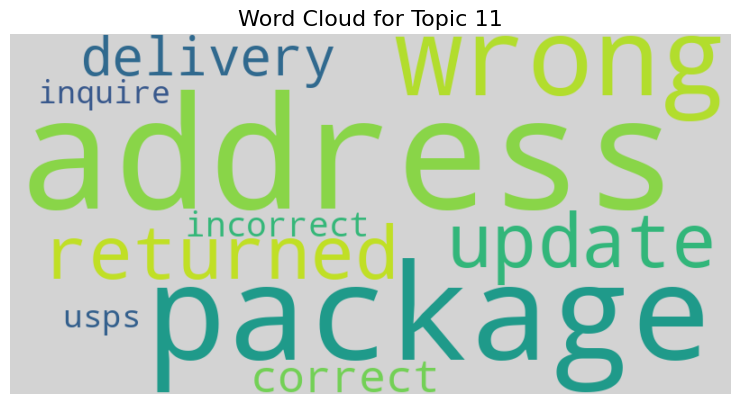

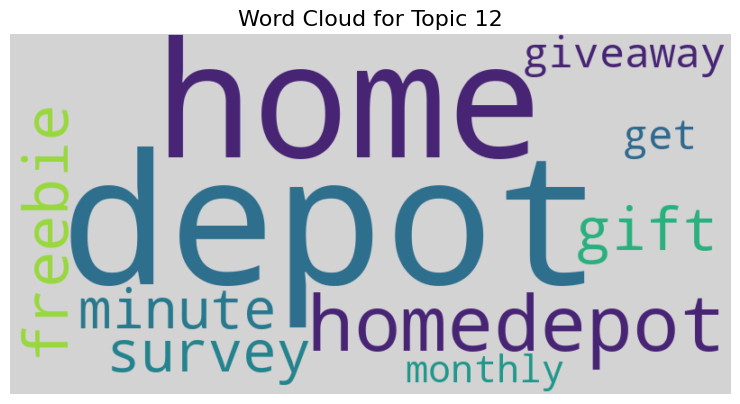

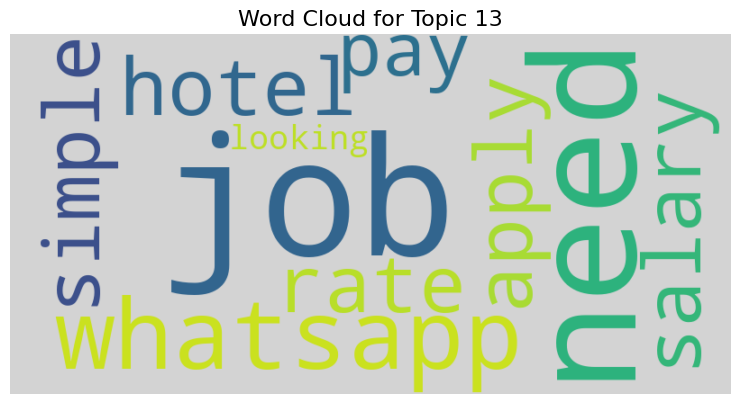

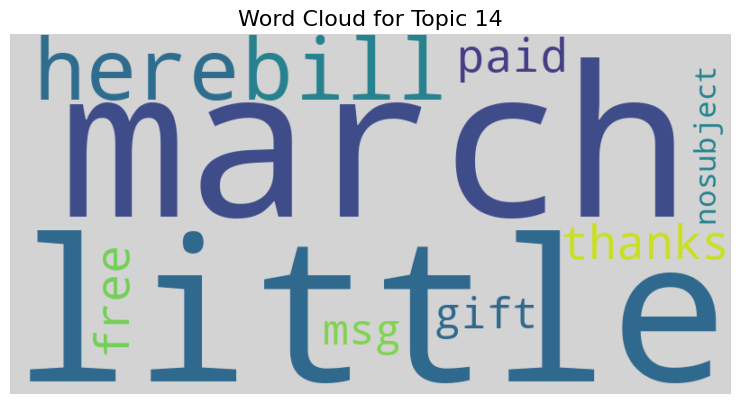

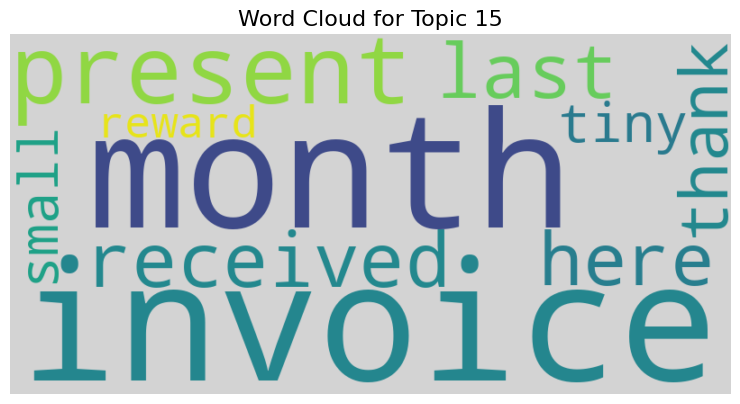

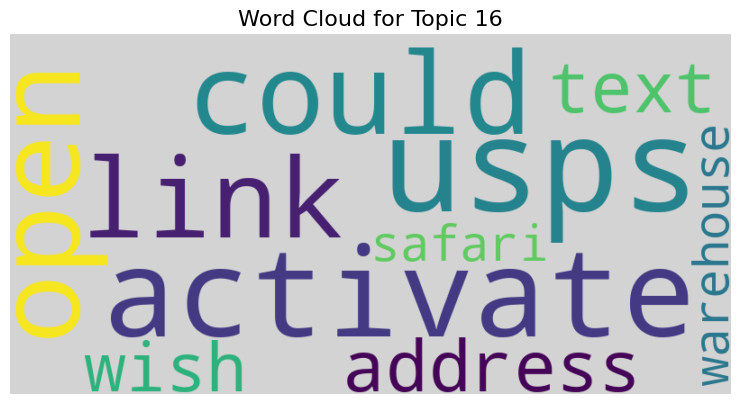

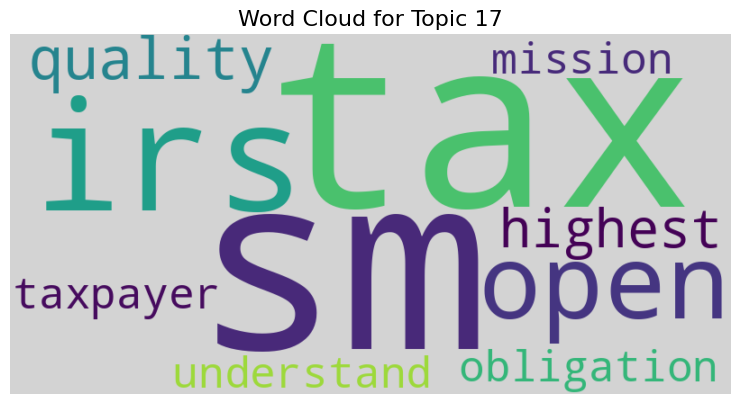

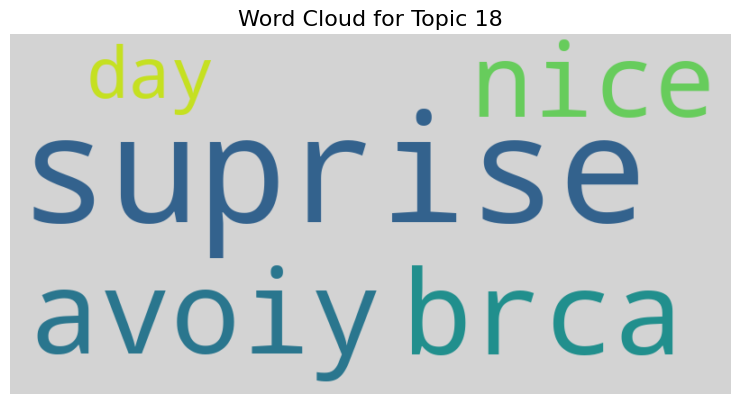

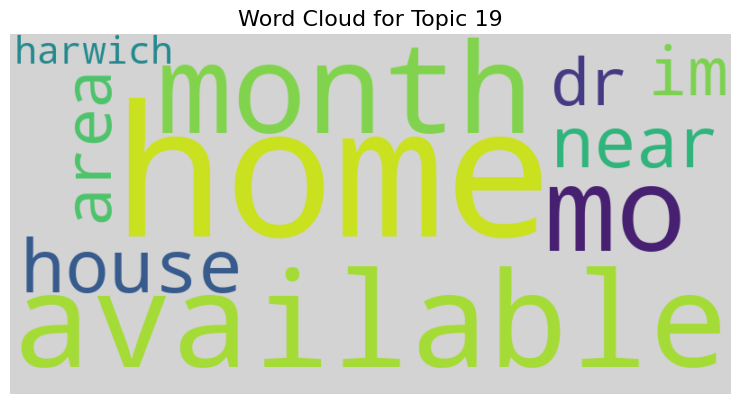

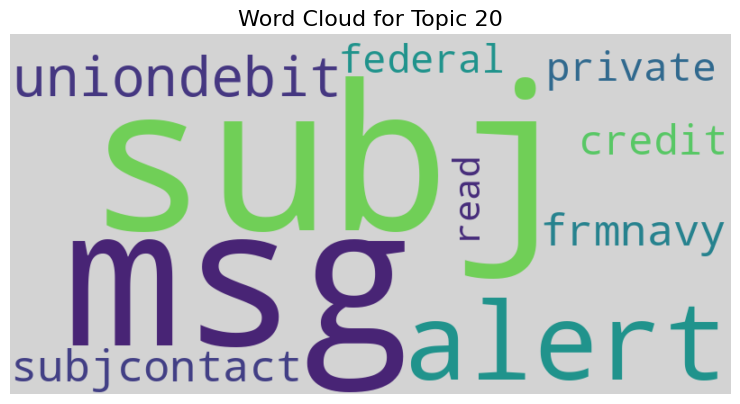

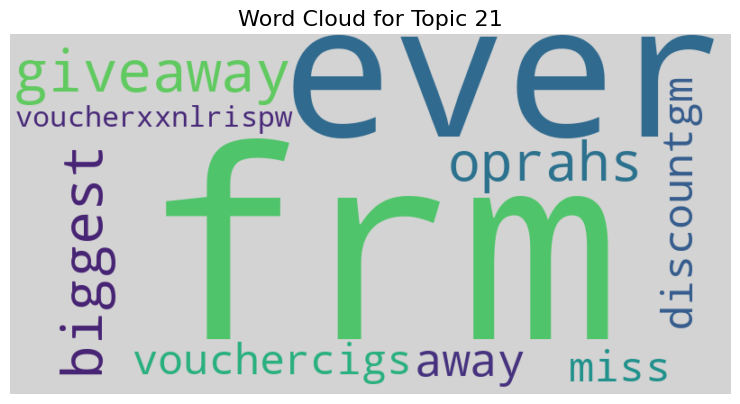

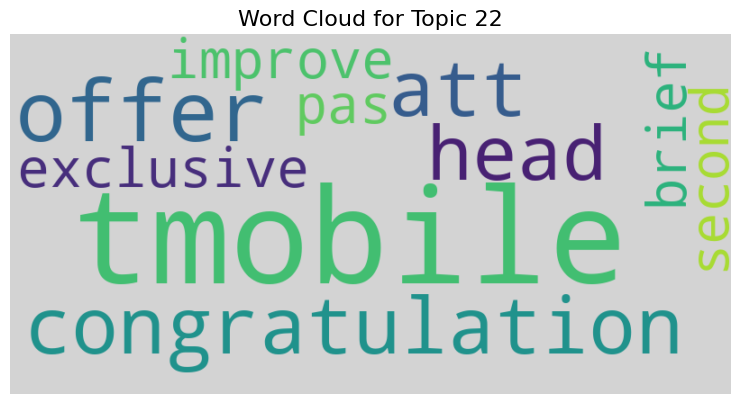

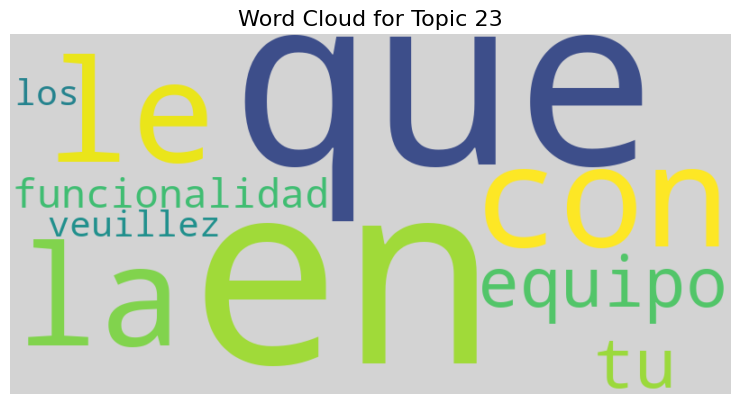

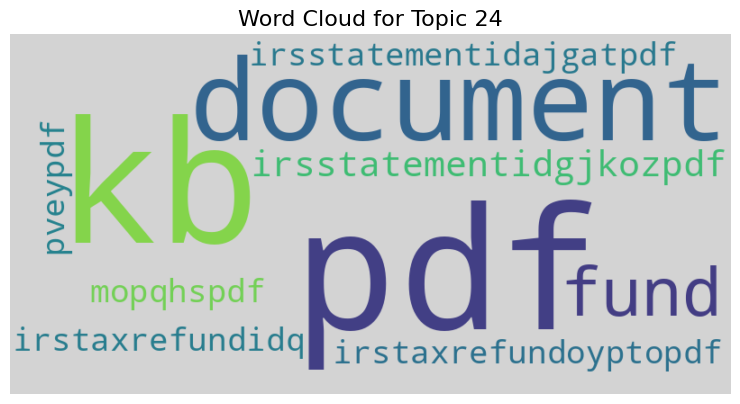

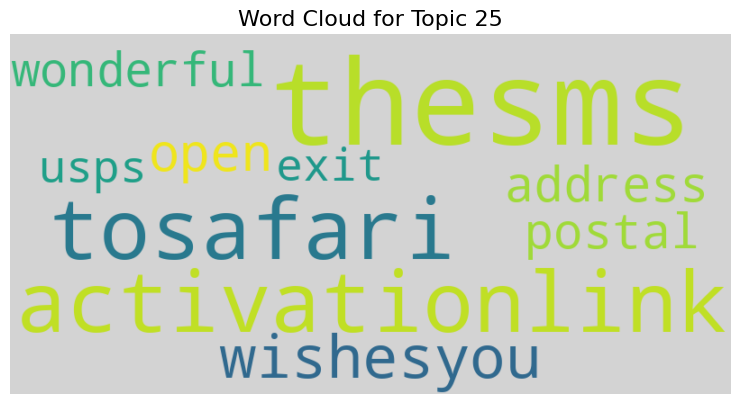

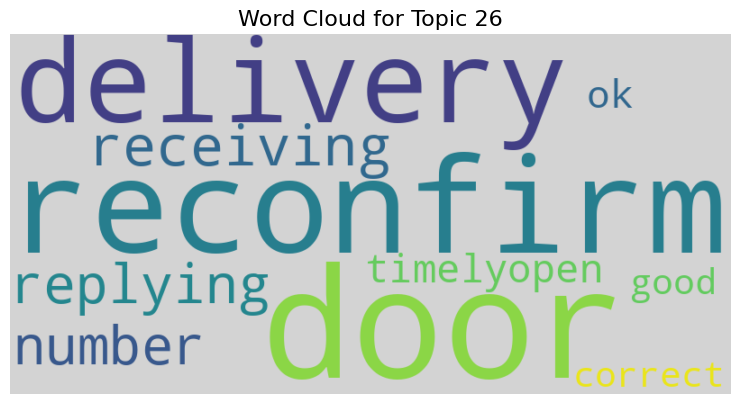

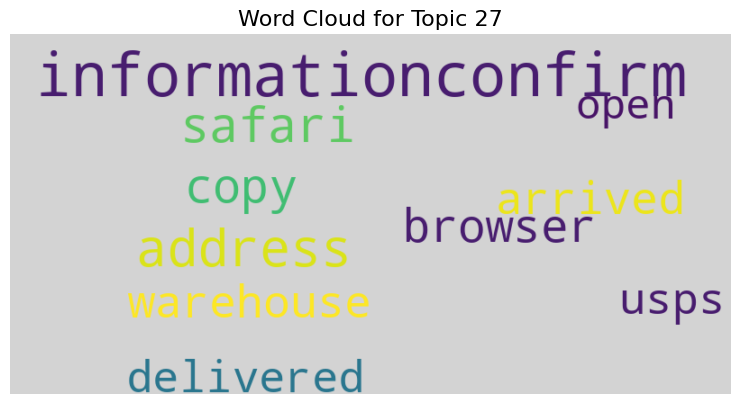

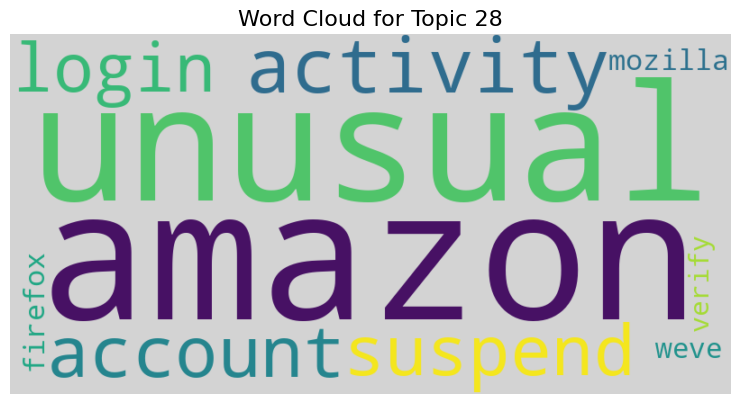

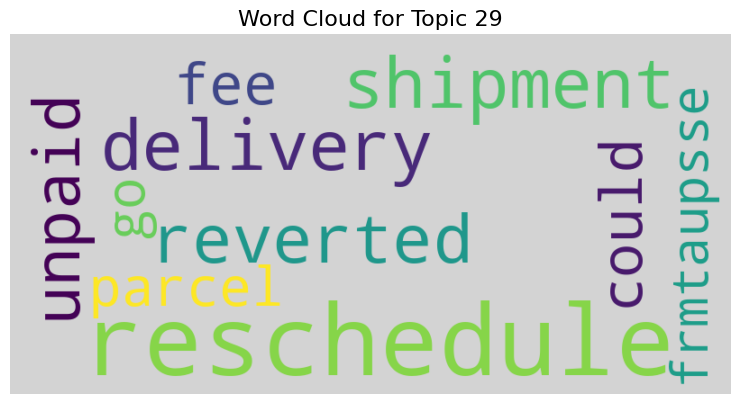

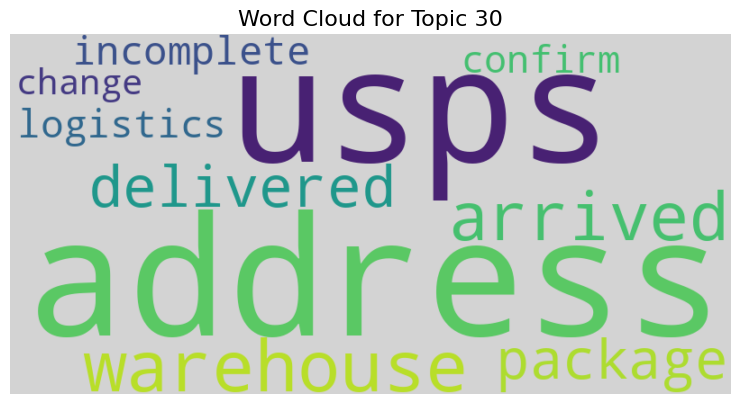

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to generate word cloud for a topic
def generate_word_cloud(topic_model, topic_id):
    # Get the top words for the topic
    words = topic_model.get_topic(topic_id)

    # Prepare data for WordCloud
    word_freq = {word: value for word, value in words}

    # Generate the WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color="lightgrey").generate_from_frequencies(word_freq)

    # Display the WordCloud with additional spacing and a border
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud for Topic {topic_id}", fontsize=16)

    # Add a border around the word cloud
    ax = plt.gca()
    for spine in ax.spines.values():
        spine.set_edgecolor("black")
        spine.set_linewidth(2)

    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.3)  # Add space around the figure
    plt.show()

# Generate Word Clouds for each topic
for topic_id in topic_model.get_topics().keys():
    #if topic_id == -1:  # Skip the noise topic
        #continue
    generate_word_cloud(topic_model, topic_id)


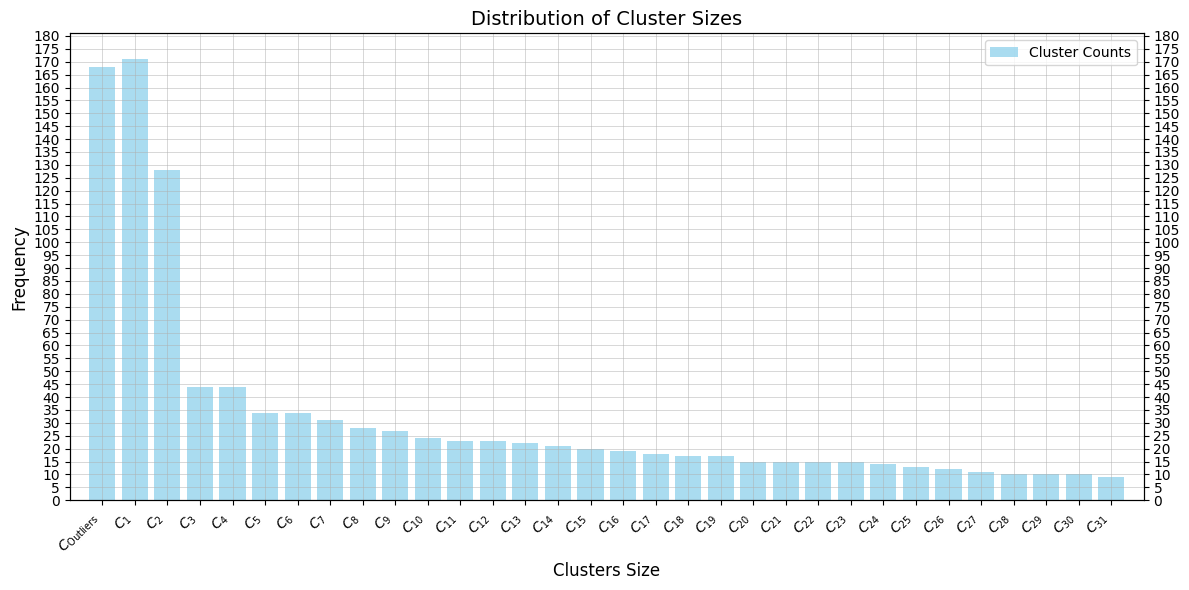

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Count the number of documents in each cluster
cluster_counts = pd.Series(df['BERTopic_Label']).value_counts()

# Ensure all cluster IDs are present
min_cluster = df['BERTopic_Label'].min()
max_cluster = df['BERTopic_Label'].max()
all_clusters = pd.Series(range(min_cluster, max_cluster + 1))  # Include all clusters

# Align counts with all cluster IDs (missing clusters will have 0 count)
cluster_counts = cluster_counts.reindex(all_clusters, fill_value=0)

# Prepare data for the histogram and line plot
clusters = cluster_counts.index
counts = cluster_counts.values

# Create custom x-axis labels with subscript formatting
x_labels = {i: f"$C_{{\\mathrm{{Outliers}}}}$" if i == -1 else f"$C_{{{i + 1}}}$" for i in clusters}
x_labels_list = [x_labels[i] for i in clusters]  # Create the list in the same order as clusters

# Create a figure with histogram and line plot overlay
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the histogram
ax1.bar(clusters, counts, color='skyblue', alpha=0.7, label='Cluster Counts')

# Add detailed numbers and grid lines
ax1.set_xlabel('Clusters Size', fontsize=12)
ax1.set_ylabel('Frequency', fontsize=12)
ax1.set_title('Distribution of Cluster Sizes', fontsize=14)
ax1.legend(loc='upper right')

# Update x-axis labels
ax1.set_xticks(clusters)
ax1.set_xticklabels(x_labels_list, rotation=45, ha='right', fontsize=10)

# Add major and minor grid lines
ax1.grid(which='major', linestyle='-', linewidth=0.5, alpha=0.7)
ax1.grid(which='minor', linestyle=':', linewidth=0.5, alpha=0.5)

# Set limits for x and y axes for better scaling
ax1.set_xlim(min_cluster - 1, max_cluster + 1)
ax1.set_ylim(0, max(counts) + 10)

# Add detailed y-ticks with more frequent intervals
y_ticks = np.arange(0, max(counts) + 10, step=5)  # Adjust step size as needed
ax1.set_yticks(y_ticks)

# Add secondary y-axis for flexibility (optional)
ax2 = ax1.twinx()
ax2.set_ylim(ax1.get_ylim())
ax2.set_yticks(ax1.get_yticks())
ax2.set_yticklabels([f"{v}" for v in y_ticks], fontsize=10)

# Show the combined plot
plt.tight_layout()
plt.show()



In [ ]:
df.to_csv('processed_dataset_112720241555_after_clustering.csv', index=False)

from google.colab import files
files.download('processed_dataset_112720241555_after_clustering.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
from google.colab import files

# Upload the file
uploaded2 = files.upload()

# Load the Excel file into a DataFrame
file_name2 = list(uploaded2.keys())[0]  # Get the uploaded file name
new_df = pd.read_excel(file_name2)

# Display the first few rows to confirm successful upload
new_df.head()



Saving labeled_test-benign_smishviz_original_messages_all.xlsx to labeled_test-benign_smishviz_original_messages_all (7).xlsx


,messageid,Fulltext,Label
0,3,"Text Message\nThu, Jul 29, 19:10\nCostco: Dani...",0
1,17,"+6797002222\nFriday, March 25, 2022\nAmazing n...",0
2,19,5:49 9\n9.3.\n?\n[{]\n+17272974784 ?\nHey Niaz...,1
3,23,"<\nbofa-rjt@rjt.craftybrid...\nSunday, March 6...",1
4,27,12:26\n<+12136480125\nAdd to contacts\n|||\nFr...,0


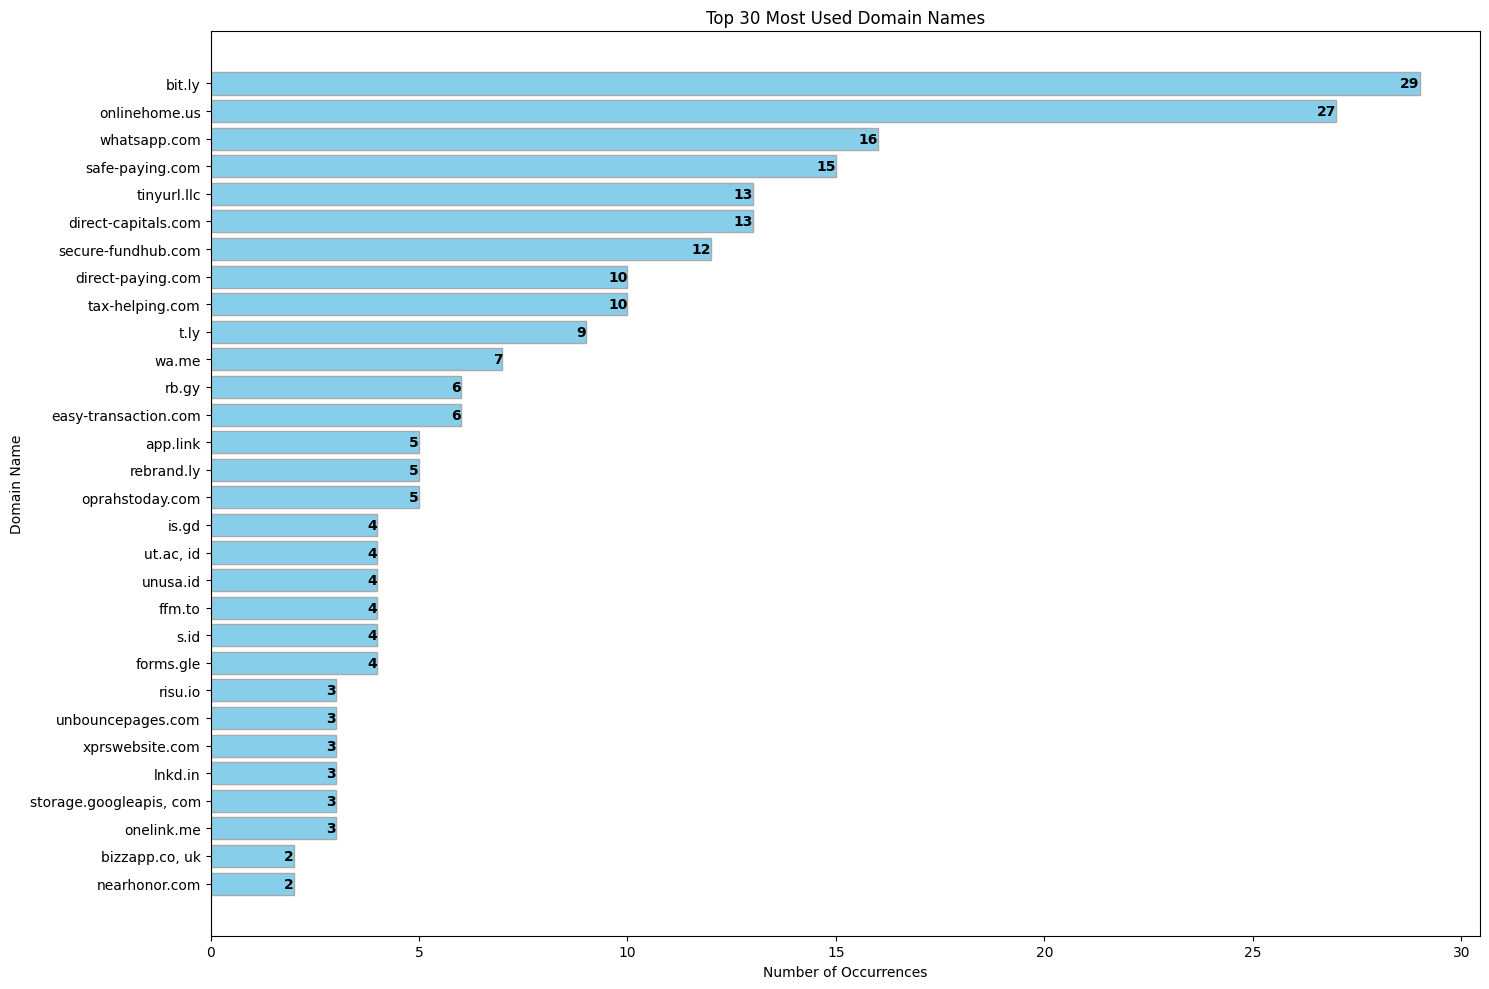

In [ ]:
data = df
# Count occurrences of each domain
domain_counts = data['Domain'].value_counts()

# Remove nan if present
domain_counts = domain_counts.drop('nan', errors='ignore')

# Select the top 30 most used domain names
top_domains = domain_counts.head(30)

# Create labels by combining Domain and TLD
labels = [f"{domain}.{data[data['Domain'] == domain]['TLD'].iloc[0]}" for domain in top_domains.index]

# Plot a horizontal bar chart with borders
plt.figure(figsize=(15, 10))
bars = plt.barh(labels, top_domains.values, color='skyblue', edgecolor='darkgrey')  # Add edgecolor for borders
plt.xlabel('Number of Occurrences')
plt.ylabel('Domain Name')
plt.title('Top 30 Most Used Domain Names')
plt.gca().invert_yaxis()  # Invert y-axis to have the most frequent at the top

# Add number labels to the end of each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{int(width)}',
             ha='right', va='center', fontweight='bold')

plt.tight_layout()
plt.show()


In [ ]:
# Remove rows where 'Domain' or 'TLD' is nan
data = data[data['Domain'].notna() & data['TLD'].notna()]

# Remove 'nan.nan' explicitly
data = data[~((data['Domain'] == 'nan') & (data['TLD'] == 'nan'))]

# Combine Domain and TLD
data['FullDomain'] = data['Domain'] + '.' + data['TLD']

# Group by full domain and count unique clusters
domain_cluster_counts = data.groupby('FullDomain')['BERTopic_Label'].nunique().reset_index(name='Unique Clusters')

# Sort by the number of unique clusters in descending order and select the top 10
top_domains = domain_cluster_counts.sort_values(by='Unique Clusters', ascending=False).head(10)

# Display the result
print(top_domains)

            FullDomain  Unique Clusters
73              bit.ly                9
518        tinyurl.com                7
423         rebrand.ly                4
419              rb.gy                4
42            app.link                3
540  unbouncepages.com                3
510    tax-helping.com                3
440               s.id                3
507               t.co                3
630              wa.me                3


In [ ]:
# Remove rows where 'Domain' or 'TLD' is NaN
data = data[data['Domain'].notna() & data['TLD'].notna()]

# Remove 'nan.nan' explicitly
data = data[~((data['Domain'] == 'nan') & (data['TLD'] == 'nan'))]

# Combine Domain and TLD


#data['FullDomain'] = data['Domain'] + '.' + data['TLD']
data['FullDomain'] = data['Domain']

# Replace 'FullDomain' with redirected domain if 'RedirectedURL' is available
if 'RedirectedURL' in data.columns:
    # Extract domain and TLD from the redirected URL if available
    data['RedirectedDomain'] = data['RedirectedURL'].str.extract(r'^(?:https?://)?(?:www\.)?([^/]+)')[0]
    data['RedirectedDomain'] = data['RedirectedDomain'].fillna(data['Domain'])  # Keep original domain if no redirection
    data['RedirectedTLD'] = data['RedirectedDomain'].str.split('.').str[-1]
    data['RedirectedFullDomain'] = data['RedirectedDomain']

    # Replace FullDomain with RedirectedFullDomain where applicable
    data['FullDomain'] = data['RedirectedFullDomain']

# Group by full domain and count unique clusters
domain_cluster_counts = data.groupby('FullDomain')['BERTopic_Label'].nunique().reset_index(name='Unique Clusters')

# Sort by the number of unique clusters in descending order and select the top 10
top_domains = domain_cluster_counts.sort_values(by='Unique Clusters', ascending=False).head(10)

# Display the result
print(top_domains)


      FullDomain  Unique Clusters
220   google.com                5
573     usps.com                5
68           bit                4
505            t                4
369   onlinehome                3
507  tax-helping                3
40           app                3
195        forms                3
608           wa                3
516      tinyurl                3


In [ ]:


# Create the "actualURL" column based on the specified conditions
df['actualURL'] = df.apply(
    lambda row: row['Url'] if pd.isna(row['RedirectedURL']) and not pd.isna(row['Url'])
                else (row['RedirectedURL'] if not pd.isna(row['RedirectedURL']) else ''), axis=1
)

# Save the updated dataset
updated_file_path = 'updated_dataset_with_actualURL.csv'  # Replace with your desired file path
df.head()

,messageid,Fulltext,Sender,SenderType,timeReceived,MainText,Url,Subdomain,Domain,TLD,...,MainTextLength,UrlLength,CleanedMessageLength,LengthMatch,SuperCleanedMessage,BERTopic_Label,BERTopic_1,BERTopic_2,BERTopic_3,actualURL
0,3,"Text Message\nThu, Jul 29, 19:10\nCostco: Dani...",42003,Short Code,"03/31/2022, 21:58:50","Costco: Daniel, the code 42003 printed on your...",f2gpy.info/RzNKEwsZve,NaN,f2gpy,info,...,118,21,96,True,costco daniel code printed receipt came nd air...,-1,,,,f2gpy.info/RzNKEwsZve
1,5,"<\n+1 (872) 279-0672 >\nText Message\nWed, Feb...",+1 (872) 279-0672,Phone Number,"04/02/2022, 02:59:56","Hi, you still owe UPS $4.10 USD in customs fee...",NaN,NaN,NaN,NaN,...,128,0,128,True,hi still owe ups usd custom fee previous packa...,-1,,,,
2,6,"<\n+1 (806) 224-7886 >\nText Message\nThu, Sep...",+1 (806) 224-7886,Phone Number,"04/02/2022, 03:03:00",wel01.us/r/rest05 WELLS FARGO(CS):Profile lock...,wel01.us/r/rest05,NaN,wel01,us,...,120,17,103,True,well fargocsprofile locked unusual activity ki...,0,account,visit,card,https://www.yahoo.com/
3,7,Text Message\nToday 2:30 PM\nwho played golf\n...,NaN,NaN,"04/02/2022, 23:42:38","Hi, are you who played golf together last time...",NaN,NaN,NaN,NaN,...,56,0,56,True,hi played golf together last time im lisa,1,im,hi,hey,
4,8,(8\n+1 (775) 537-4497\ncanador to them\nTato m...,+1 (775) 537-4497,Phone Number,"04/02/2022, 23:46:34","(8 Hi Julianne long time no see, I'm Aleen, ho...",NaN,NaN,NaN,NaN,...,62,0,62,True,hi julianne long time see im aleen,1,im,hi,hey,


In [ ]:

# Function to extract the domain and TLD from a URL
def extract_domain_and_tld(url):
    if not url or pd.isna(url):
        return '', ''  # Return empty strings for empty URLs
    try:
        # Extract the domain and TLD using regex
        match = re.search(r"https?://(?:www\.)?([^/]+)", url)
        if match:
            domain_parts = match.group(1).split('.')
            if len(domain_parts) >= 2:
                return domain_parts[-2], domain_parts[-1]  # Return domain and TLD
    except Exception as e:
        return '', ''  # Return empty strings if any exception occurs
    return '', ''  # Default return value

# Apply the function to extract domain and TLD for each row
df[['actualDomain', 'actualTLD']] = df['actualURL'].apply(
    lambda url: pd.Series(extract_domain_and_tld(url))
)

# Save the updated dataset
updated_file_path_with_domains = 'updated_dataset_with_actualDomain_and_TLD.csv'
df.to_csv(updated_file_path_with_domains, index=False)

print(f"Updated dataset with actualDomain and actualTLD saved to: {updated_file_path_with_domains}")


Updated dataset with actualDomain and actualTLD saved to: updated_dataset_with_actualDomain_and_TLD.csv


In [ ]:
data = df
# Remove rows where 'Domain' or 'TLD' is nan
data = data[data['actualDomain'].notna() & data['actualTLD'].notna()]

# Remove 'nan.nan' explicitly
data = data[~((data['actualDomain'] == 'nan') & (data['actualTLD'] == 'nan'))]

# Combine Domain and TLD
data['FullDomain'] = data['actualDomain'] + '.' + data['actualTLD']

# Group by full domain and count unique clusters
domain_cluster_counts = data.groupby('FullDomain')['BERTopic_Label'].nunique().reset_index(name='Unique Clusters')

# Sort by the number of unique clusters in descending order and select the top 10
top_domains = domain_cluster_counts.sort_values(by='Unique Clusters', ascending=False).head(30)

# Display the result
print(top_domains)

                FullDomain  Unique Clusters
0                        .               29
367               usps.com                5
143             google.com                5
328            tinyurl.com                4
413            wixsite.com                4
131              forms.gle                3
407           whatsapp.com                3
393                  wa.me                3
26                app.link                3
92             dakitis.com                3
230          onlinehome.us                3
323        tax-helping.com                3
412            windows.net                3
277                   s.id                3
321                   t.co                2
261          rebrandly.com                2
210                  my.id                2
206             msgdeal.co                2
387  voicetabular.boutique                2
202          molezcorn.com                2
72          cloudlets.zone                2
257                qrco.de      

In [ ]:
df.to_csv('processed_dataset_271120241636_with_actual_urls.csv', index=False)

from google.colab import files
files.download('processed_dataset_271120241636_with_actual_urls.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Remove rows where 'Domain' or 'TLD' is NaN
data = data[data['actualDomain'].notna() & data['actualTLD'].notna()]

# Remove 'nan.nan' explicitly
data = data[~((data['actualDomain'] == 'nan') & (data['actualTLD'] == 'nan'))]

# Combine Domain and TLD
data['FullDomain'] = data['actualDomain'] + '.' + data['actualTLD']

# Group by FullDomain and aggregate cluster information
domain_cluster_info = data.groupby('FullDomain').agg(
    Unique_Clusters=('BERTopic_Label', 'nunique'),  # Count unique clusters
    Cluster_IDs=('BERTopic_Label', lambda x: list(x.unique()))  # Collect unique cluster IDs as a list
).reset_index()

# Sort by the number of unique clusters in descending order and select the top 30
top_domains = domain_cluster_info.sort_values(by='Unique_Clusters', ascending=False).head(30)

# Display the result
print(top_domains)


                FullDomain  Unique_Clusters  \
0                        .               29   
367               usps.com                5   
143             google.com                5   
328            tinyurl.com                4   
413            wixsite.com                4   
131              forms.gle                3   
407           whatsapp.com                3   
393                  wa.me                3   
26                app.link                3   
92             dakitis.com                3   
230          onlinehome.us                3   
323        tax-helping.com                3   
412            windows.net                3   
277                   s.id                3   
321                   t.co                2   
261          rebrandly.com                2   
210                  my.id                2   
206             msgdeal.co                2   
387  voicetabular.boutique                2   
202          molezcorn.com                2   
72          c

In [ ]:
# List of domains to exclude
excluded_domains = ['google.com', 'tinyurl.com']  # Add domains to exclude here

# Remove rows where 'Domain' or 'TLD' is NaN
data = data[data['actualDomain'].notna() & data['actualTLD'].notna()]

# Remove 'nan.nan' explicitly
data = data[~((data['actualDomain'] == 'nan') & (data['actualTLD'] == 'nan'))]

# Combine Domain and TLD
data['FullDomain'] = data['actualDomain'] + '.' + data['actualTLD']

# Exclude specified domains
data = data[~data['FullDomain'].isin(excluded_domains)]

# Group by FullDomain and aggregate cluster information
domain_cluster_info = data.groupby('FullDomain').agg(
    Unique_Clusters=('BERTopic_Label', 'nunique'),  # Count unique clusters
    Cluster_IDs=('BERTopic_Label', lambda x: list(x.unique()))  # Collect unique cluster IDs as a list
).reset_index()

# Sort by the number of unique clusters in descending order and select the top 30
top_domains = domain_cluster_info.sort_values(by='Unique_Clusters', ascending=False).head(30)

# Display the result
print(top_domains)

              FullDomain  Unique_Clusters  \
0                      .               25   
26              app.link                3   
322      tax-helping.com                3   
131            forms.gle                3   
92           dakitis.com                3   
365             usps.com                3   
391                wa.me                3   
405         whatsapp.com                3   
410          windows.net                3   
411          wixsite.com                3   
229        onlinehome.us                3   
7          404domain.com                3   
201        molezcorn.com                2   
344    unbouncepages.com                2   
287   secure-fundhub.com                2   
276                 s.id                2   
303         snapchat.com                2   
94              ddns.net                2   
260        rebrandly.com                2   
256              qrco.de                2   
99   direct-capitals.com                2   
72        

In [ ]:


# Group by the 'BERTopic_Label' column and count the number of messages in each cluster
cluster_sizes = df.groupby('BERTopic_Label').size().reset_index(name='Size (# of Messages within each cluster)')

# Display the result
print(cluster_sizes)


    BERTopic_Label  Size (# of Messages within each cluster)
0               -1                                       168
1                0                                       171
2                1                                       128
3                2                                        44
4                3                                        44
5                4                                        34
6                5                                        34
7                6                                        31
8                7                                        28
9                8                                        27
10               9                                        24
11              10                                        23
12              11                                        23
13              12                                        22
14              13                                        21
15              14      

In [ ]:


# Combine 'actualDomain' and 'actualTLD' to form a web address
df['actualWebAddress'] = df['actualDomain'].fillna('') + '.' + df['actualTLD'].fillna('')

# Group by 'BERTopic_Label' and calculate both the size and the number of unique web addresses
cluster_stats = (
    df.groupby('BERTopic_Label')
    .agg(
        Size=('messageid', 'size'),
        Unique_Web_Addresses=('actualWebAddress', lambda x: x.nunique())
    )
    .reset_index()
)

# Rename columns for clarity
cluster_stats.rename(columns={
    'Size': 'Size (# of Messages within each cluster)',
    'Unique_Web_Addresses': 'Unique Web Addresses'
}, inplace=True)

# Display the result
print(cluster_stats)


    BERTopic_Label  Size (# of Messages within each cluster)  \
0               -1                                       168   
1                0                                       171   
2                1                                       128   
3                2                                        44   
4                3                                        44   
5                4                                        34   
6                5                                        34   
7                6                                        31   
8                7                                        28   
9                8                                        27   
10               9                                        24   
11              10                                        23   
12              11                                        23   
13              12                                        22   
14              13                      

In [ ]:
# Assign cluster names based on the rules
def assign_cluster_name(label):
    if label == -1:
        return 'C(outlier)'
    else:
        return f'C{label}'

df['Cluster_Name'] = df['BERTopic_Label'].apply(assign_cluster_name)

# Group by 'Cluster_Name' and calculate both the size and the number of unique web addresses
cluster_stats = (
    df.groupby('Cluster_Name')
    .agg(
        Size=('messageid', 'size'),
        Unique_Web_Addresses=('actualWebAddress', lambda x: x.nunique())
    )
    .reset_index()
)

# Rename columns for clarity
cluster_stats.rename(columns={
    'Size': 'Size (# of Messages within each cluster)',
    'Unique_Web_Addresses': 'Unique Web Addresses'
}, inplace=True)

# Display the result
print(cluster_stats)

   Cluster_Name  Size (# of Messages within each cluster)  \
0    C(outlier)                                       168   
1            C0                                       171   
2            C1                                       128   
3           C10                                        23   
4           C11                                        23   
5           C12                                        22   
6           C13                                        21   
7           C14                                        20   
8           C15                                        19   
9           C16                                        18   
10          C17                                        17   
11          C18                                        17   
12          C19                                        15   
13           C2                                        44   
14          C20                                        15   
15          C21         

In [ ]:
# Create the new column based on the BERTopic_Label column
df['Cluster_name_label'] = df['BERTopic_Label'].apply(
    lambda x: f"C(Outlier)" if x == -1 else f"C({x + 1})" if x >= 0 else None
)

# Save the updated dataset
updated_file_path = 'updated_dataset_with_new_column.csv'  # Replace with your desired output file path
df.to_csv(updated_file_path, index=False)

print(f"Updated dataset saved to {updated_file_path}")

Updated dataset saved to updated_dataset_with_new_column.csv


In [ ]:
df.to_csv('processed_dataset_271120241746_with_cluster_names.csv', index=False)

from google.colab import files
files.download('processed_dataset_271120241746_with_cluster_names.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
from urllib.parse import urlparse
from google.colab import files

# Load your DataFrame
dataset = df  # Replace `df` with your actual DataFrame variable if different

# Function to extract domain and TLD from a URL
def extract_domain_and_tld(url):
    if pd.isnull(url):
        return None, None
    try:
        # Ensure URL has a scheme for parsing
        if not url.startswith(('http://', 'https://')):
            url = 'http://' + url
        parsed_url = urlparse(url)
        domain_parts = parsed_url.netloc.split('.')
        if len(domain_parts) >= 2:
            domain = domain_parts[-2]  # Second-to-last part is the domain
            tld = domain_parts[-1]    # Last part is the TLD
            return domain, tld
        else:
            print(f"Malformed URL detected: {url}")
    except Exception as e:
        print(f"Error parsing URL {url}: {e}")
    return None, None

# Process rows where actualDomain is empty but actualURL has a value
for index, row in dataset.iterrows():
    if pd.isnull(row['actualDomain']) and pd.notnull(row['actualURL']):
        print(f"Processing row {index} with actualURL: {row['actualURL']}")
        domain, tld = extract_domain_and_tld(row['actualURL'])
        dataset.at[index, 'actualDomain'] = domain
        dataset.at[index, 'actualTLD'] = tld

# Save the updated dataset to a file
updated_file_path = '/content/updated_dataset_with_domain_and_tld236.csv'
dataset.to_csv(updated_file_path, index=False)

# Automatically download the updated file
files.download(updated_file_path)




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

dataset = df

# Function to extract domain and TLD manually
def extract_domain_and_tld(url):
    if pd.isnull(url):
        return None, None
    try:
        # Split the URL on '/' to separate domain part
        base_url = url.split('/')[0]  # Extract base domain from URL
        domain_parts = base_url.split('.')
        if len(domain_parts) >= 2:
            domain = domain_parts[0]  # First part is the domain
            tld = domain_parts[1]     # Second part is the TLD
            return domain, tld
    except Exception as e:
        print(f"Error processing URL {url}: {e}")
    return None, None

# Process rows where actualDomain is empty but actualURL has a value
for index, row in dataset.iterrows():
    if pd.isnull(row['actualDomain']) and pd.notnull(row['actualURL']):
        domain, tld = extract_domain_and_tld(row['actualURL'])
        dataset.at[index, 'actualDomain'] = domain
        dataset.at[index, 'actualTLD'] = tld

# Save the updated dataset
updated_file_path = 'final_updated_dataset_with_domain_and_tld63.csv'
dataset.to_csv(updated_file_path, index=False)

# Confirm the file path for download
updated_file_path

'final_updated_dataset_with_domain_and_tld63.csv'

In [ ]:
print(df.head)

<bound method NDFrame.head of       messageid                                           Fulltext  \
0             3  Text Message\nThu, Jul 29, 19:10\nCostco: Dani...   
1             5  <\n+1 (872) 279-0672 >\nText Message\nWed, Feb...   
2             6  <\n+1 (806) 224-7886 >\nText Message\nThu, Sep...   
3             7  Text Message\nToday 2:30 PM\nwho played golf\n...   
4             8  (8\n+1 (775) 537-4497\ncanador to them\nTato m...   
...         ...                                                ...   
1057       1813  +\n10:53\n738012605012@jaihindnews24... >\npdf...   
1058       1815  <\n'O\n+1 (323) 615-7191 >\nHey. Amy when are ...   
1059       1816  ..ll Verizon\n10\n9:42 AM\nfrosssusanberry@gma...   
1060       1817  +1 (769) 296-5436 >\nText Message\nYesterday 1...   
1061       1818  12:25\n4\n9\n+1 (769) 296-5591 >\nText Message...   

                          Sender     SenderType          timeReceived  \
0                          42003     Short Code  03/31/2

In [ ]:
files.download('final_updated_dataset_with_domain_and_tld63.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
from urllib.parse import urlparse

def process_url(url):
    """Parse a URL and return subdomain and TLD."""
    if not url:
        return None, None

    # Add scheme if missing
    if not url.startswith(('http://', 'https://')):
        url = f"http://{url}"

    # Parse the URL
    parsed_url = urlparse(url)

    # Extract the domain part
    domain = parsed_url.netloc or parsed_url.path.split('/')[0]

    # Remove 'www.' if it exists
    if domain.startswith("www."):
        domain = domain[4:]

    # Split the domain into parts
    domain_parts = domain.split('.')

    # Determine subdomain and TLD
    if len(domain_parts) > 2:
        subdomain = '.'.join(domain_parts[:-2])  # Everything except last 2 parts
        tld = '.'.join(domain_parts[-2:])       # Last 2 parts for TLD
    elif len(domain_parts) == 2:
        subdomain = domain_parts[0]
        tld = domain_parts[1]
    else:
        subdomain = domain
        tld = None  # No TLD available

    return subdomain, tld

def process_dataset(df):
    """
    Process the dataset to fill missing `actualDomain` and `actualTLD` values
    based on the `actualURL` column.
    """
    # Identify rows where actualDomain and actualTLD are empty or NaN
    mask = (df['actualDomain'].isna() | (df['actualDomain'] == "")) & \
           (df['actualTLD'].isna() | (df['actualTLD'] == "")) & \
           df['actualURL'].notna()

    # Apply the URL processing function to the relevant rows
    df.loc[mask, ['actualDomain', 'actualTLD']] = df.loc[mask, 'actualURL'].apply(
        lambda url: pd.Series(process_url(url))
    )

    return df

# Example dataset
data = {
    'actualURL': [
        "f2gpy.info/RzNKEwsZve",
        "https://www.yahoo.com/",
        "https://chat.whatsapp.com/Djci%20PB8b7gTGGt16QJ5mJm?_fb_noscript=1",
        "https://secredirect.z13.web.core.windows.net/",
        None,
    ],
    'actualDomain': ["", None, None, None, None],
    'actualTLD': ["", None, None, None, None],
}




# Process the dataset
processed_df = process_dataset(df)

# Display the processed dataset
#import ace_tools as tools; tools.display_dataframe_to_user(name="Processed URL Dataset", dataframe=processed_df)


print(processed_df)



      messageid                                           Fulltext  \
0             3  Text Message\nThu, Jul 29, 19:10\nCostco: Dani...   
1             5  <\n+1 (872) 279-0672 >\nText Message\nWed, Feb...   
2             6  <\n+1 (806) 224-7886 >\nText Message\nThu, Sep...   
3             7  Text Message\nToday 2:30 PM\nwho played golf\n...   
4             8  (8\n+1 (775) 537-4497\ncanador to them\nTato m...   
...         ...                                                ...   
1057       1813  +\n10:53\n738012605012@jaihindnews24... >\npdf...   
1058       1815  <\n'O\n+1 (323) 615-7191 >\nHey. Amy when are ...   
1059       1816  ..ll Verizon\n10\n9:42 AM\nfrosssusanberry@gma...   
1060       1817  +1 (769) 296-5436 >\nText Message\nYesterday 1...   
1061       1818  12:25\n4\n9\n+1 (769) 296-5591 >\nText Message...   

                          Sender     SenderType          timeReceived  \
0                          42003     Short Code  03/31/2022, 21:58:50   
1            

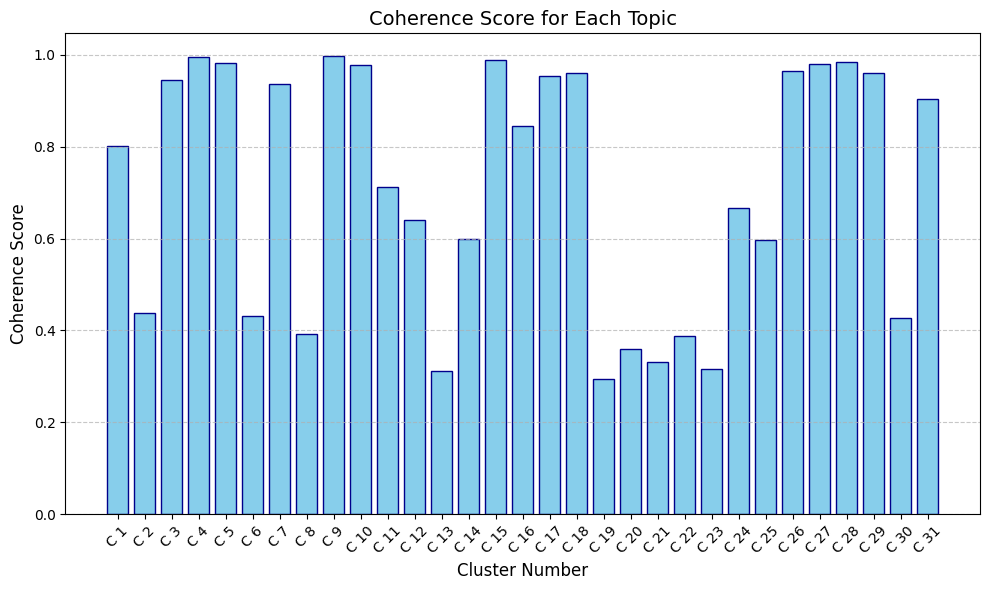

In [ ]:
import matplotlib.pyplot as plt

# Calculate coherence score for each topic
topic_coherences = [
    CoherenceModel(
        topics=[topic],
        texts=texts,
        dictionary=dictionary,
        coherence="c_v"
    ).get_coherence()
    for topic in topic_words  # `topic_words` contains word sets for each topic
]

# Visualize the coherence scores
plt.figure(figsize=(10, 6))
plt.bar(range(len(topic_coherences)), topic_coherences, color='skyblue', edgecolor='darkblue')
plt.xlabel('Cluster Number', fontsize=12)
plt.ylabel('Coherence Score', fontsize=12)
plt.title('Coherence Score for Each Topic', fontsize=14)
plt.xticks(
    range(len(topic_coherences)),
    [f"C {i + 1}" for i in range(len(topic_coherences))],
    rotation=45,
    fontsize=10
)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
